<a href="https://colab.research.google.com/github/likhithaap/Potato-disease-classification-deep-learning-/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os 
file=os.listdir('.')
print(file)

['.config', 'sample_data']


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt


In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("./drive/MyDrive/Datasets/Potato/Test", shuffle= True, image_size=(256, 256), batch_size= 32)

Found 300 files belonging to 3 classes.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory("./drive/MyDrive/Datasets/Potato/Valid", shuffle= True, image_size=(256, 256), batch_size= 32)

Found 300 files belonging to 3 classes.


In [8]:
class_names= dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


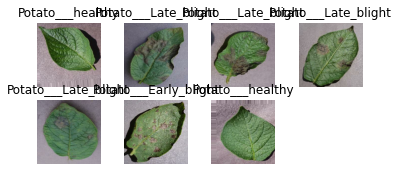

In [9]:
for image_batch, label_batch in dataset.take(1):
 for i in range(7):
    ax= plt.subplot(3,4,i+1)
    print(image_batch[i].shape)
    plt.imshow(image_batch[i].numpy().astype("uint"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [11]:
resize_and_rescale= tf.keras.Sequential(
    [
     layers.experimental.preprocessing.Resizing(256, 256),
     layers.experimental.preprocessing.Rescaling(0.1/255)     
    ]
)

Data augmentation 

In [12]:
data_augment = tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"
),
                     layers.experimental.preprocessing.RandomRotation(
    0.4
)
])

CNN model structure

In [48]:
model = models.Sequential([
    resize_and_rescale,
    data_augment,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, 'relu'),
    layers.Dense(3, activation='softmax')]
)
model.build(input_shape= (32, 256, 256, 3))

In [49]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [50]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False), metrics=['accuracy'])

In [51]:
history= model.fit(
    dataset,
    epochs = 50,
    batch_size= 32,
    verbose=1,
    validation_data= val_ds,
)

Epoch 1/50
10/10 [==============================] - 5s 284ms/step - loss: 1.1047 - accuracy: 0.4000 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 2/50
10/10 [==============================] - 3s 261ms/step - loss: 1.0897 - accuracy: 0.3867 - val_loss: 1.0586 - val_accuracy: 0.4067
Epoch 3/50
10/10 [==============================] - 3s 265ms/step - loss: 0.9826 - accuracy: 0.5133 - val_loss: 0.8834 - val_accuracy: 0.5967
Epoch 4/50
10/10 [==============================] - 3s 260ms/step - loss: 0.7775 - accuracy: 0.6233 - val_loss: 0.6803 - val_accuracy: 0.7667
Epoch 5/50
10/10 [==============================] - 3s 261ms/step - loss: 0.6417 - accuracy: 0.7300 - val_loss: 0.5897 - val_accuracy: 0.7000
Epoch 6/50
10/10 [==============================] - 3s 259ms/step - loss: 0.5616 - accuracy: 0.7667 - val_loss: 0.4858 - val_accuracy: 0.8167
Epoch 7/50
10/10 [==============================] - 3s 259ms/step - loss: 0.5215 - accuracy: 0.7767 - val_loss: 0.4725 - val_accuracy: 0.8100
Epoch 